In [65]:
# 필요한 모듈들
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline   
import xlrd
import wbgapi as wb
from gedaTools import timeToInt

import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [10]:
totalDT = wb.data.DataFrame\
    (['SE.ENR.PRSC.FM.ZS', 'SG.GEN.PARL.ZS', 'SL.AGR.EMPL.FE.ZS', 'SL.IND.EMPL.FE.ZS', 'SL.SRV.EMPL.FE.ZS',\
        'NY.GDP.PCAP.CD'],\
        skipBlanks=True, columns='series')

In [11]:
totRST = totalDT.reset_index()
totRST = totRST.rename(columns={'SE.ENR.PRSC.FM.ZS':'ENTERSC', 'SG.GEN.PARL.ZS':'PARL',\
                                'SL.AGR.EMPL.FE.ZS':'AGR', 'SL.IND.EMPL.FE.ZS':'IND', 'SL.SRV.EMPL.FE.ZS':'SRV',\
        'NY.GDP.PCAP.CD':'GDP'})

In [12]:
totRST

,economy,time,GDP,ENTERSC,PARL,AGR,IND,SRV
0,ABW,YR1986,6472.398709,NaN,NaN,NaN,NaN,NaN
1,ABW,YR1987,7885.158927,NaN,NaN,NaN,NaN,NaN
2,ABW,YR1988,9765.909207,NaN,NaN,NaN,NaN,NaN
3,ABW,YR1989,11392.269150,NaN,NaN,NaN,NaN,NaN
4,ABW,YR1990,12306.717679,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13483,ZWE,YR2016,1464.588957,NaN,31.481481,70.930000,2.08,26.99
13484,ZWE,YR2017,1335.665064,NaN,32.575758,70.250000,2.01,27.74
13485,ZWE,YR2018,1352.162653,NaN,31.481481,69.540001,1.95,28.51
13486,ZWE,YR2019,1156.154864,NaN,31.851852,69.480003,1.93,28.59


In [13]:
totRDST = totRST.dropna(how='any')
totRDST

,economy,time,GDP,ENTERSC,PARL,AGR,IND,SRV
135,AFG,YR2005,242.031313,0.54769,27.309237,78.089996,11.53,10.380000
136,AFG,YR2006,263.733602,0.57323,27.309237,77.639999,11.80,10.570000
137,AFG,YR2007,359.693158,0.56720,27.685950,76.379997,12.69,10.930000
138,AFG,YR2008,364.660679,0.58602,27.685950,76.160004,12.92,10.920000
139,AFG,YR2009,438.076142,0.60961,27.309237,74.220001,14.81,10.970000
...,...,...,...,...,...,...,...,...
13468,ZWE,YR2001,568.386291,0.94385,10.000000,69.529999,4.29,26.180000
13469,ZWE,YR2002,530.530446,0.94233,10.000000,69.900002,4.14,25.959999
13470,ZWE,YR2003,478.007604,0.94786,10.000000,70.800003,3.99,25.209999
13479,ZWE,YR2012,1304.968011,0.96703,14.953271,71.379997,2.77,25.840000


## 여성의 사회 진출 분야와 GDP와의 관계성 시각화

### 1차 시각화 : 서로들 간의 관계성을 히스토그램으로 시각화

array([[<AxesSubplot:xlabel='GDP', ylabel='GDP'>,
        <AxesSubplot:xlabel='ENTERSC', ylabel='GDP'>,
        <AxesSubplot:xlabel='PARL', ylabel='GDP'>,
        <AxesSubplot:xlabel='AGR', ylabel='GDP'>,
        <AxesSubplot:xlabel='IND', ylabel='GDP'>,
        <AxesSubplot:xlabel='SRV', ylabel='GDP'>],
       [<AxesSubplot:xlabel='GDP', ylabel='ENTERSC'>,
        <AxesSubplot:xlabel='ENTERSC', ylabel='ENTERSC'>,
        <AxesSubplot:xlabel='PARL', ylabel='ENTERSC'>,
        <AxesSubplot:xlabel='AGR', ylabel='ENTERSC'>,
        <AxesSubplot:xlabel='IND', ylabel='ENTERSC'>,
        <AxesSubplot:xlabel='SRV', ylabel='ENTERSC'>],
       [<AxesSubplot:xlabel='GDP', ylabel='PARL'>,
        <AxesSubplot:xlabel='ENTERSC', ylabel='PARL'>,
        <AxesSubplot:xlabel='PARL', ylabel='PARL'>,
        <AxesSubplot:xlabel='AGR', ylabel='PARL'>,
        <AxesSubplot:xlabel='IND', ylabel='PARL'>,
        <AxesSubplot:xlabel='SRV', ylabel='PARL'>],
       [<AxesSubplot:xlabel='GDP', ylabel='AGR'>,
  

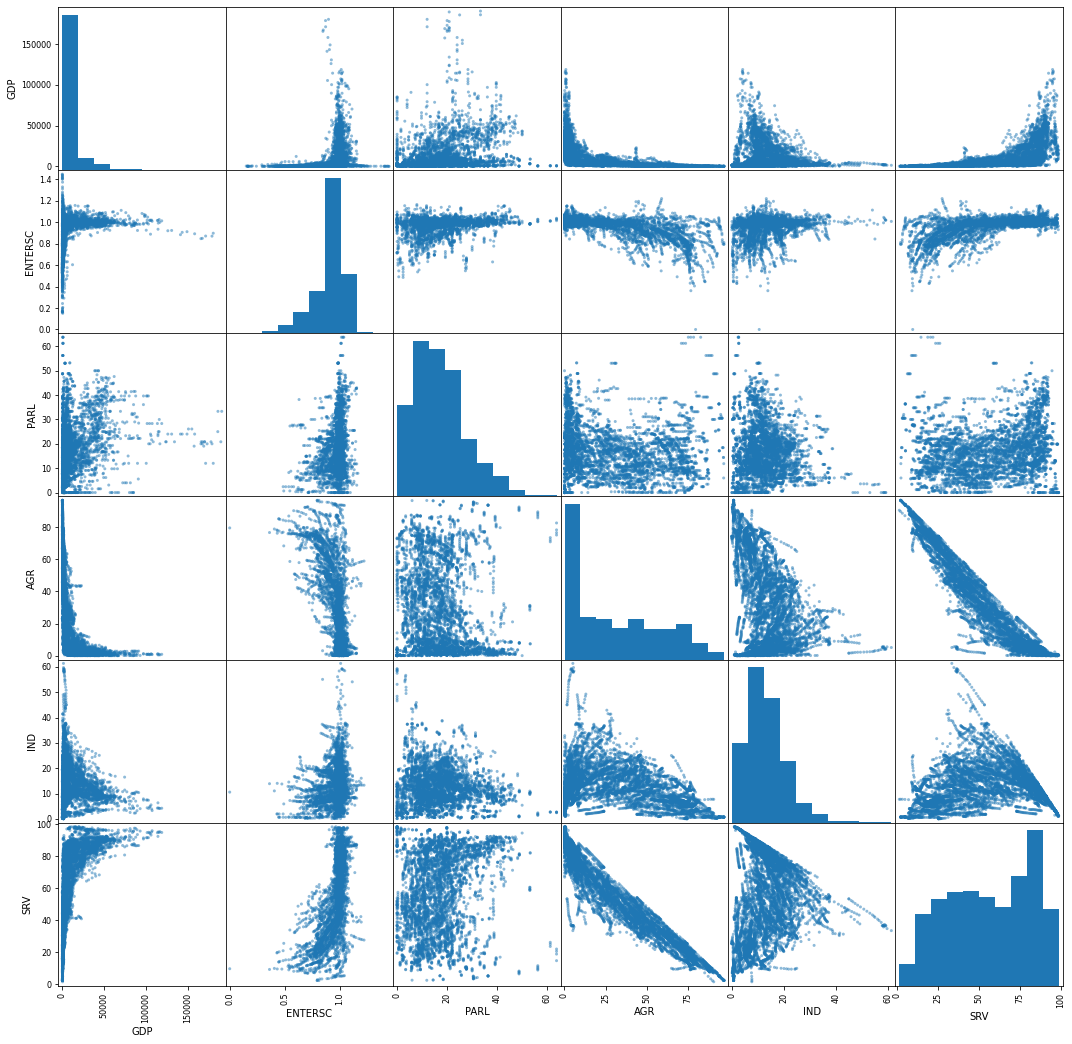

In [14]:
pd.plotting.scatter_matrix(totRST, figsize=(18, 18), diagonal='hist')

In [15]:
totRST['time'] = timeToInt(totRST)
totRST

,economy,time,GDP,ENTERSC,PARL,AGR,IND,SRV
0,ABW,1986,6472.398709,NaN,NaN,NaN,NaN,NaN
1,ABW,1987,7885.158927,NaN,NaN,NaN,NaN,NaN
2,ABW,1988,9765.909207,NaN,NaN,NaN,NaN,NaN
3,ABW,1989,11392.269150,NaN,NaN,NaN,NaN,NaN
4,ABW,1990,12306.717679,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13483,ZWE,2016,1464.588957,NaN,31.481481,70.930000,2.08,26.99
13484,ZWE,2017,1335.665064,NaN,32.575758,70.250000,2.01,27.74
13485,ZWE,2018,1352.162653,NaN,31.481481,69.540001,1.95,28.51
13486,ZWE,2019,1156.154864,NaN,31.851852,69.480003,1.93,28.59


### 2차 시각화 : 이번에는, 정규화하여 GDP에만 2를 곱하고, 다른 지표는 bar plot으로,
### GDP는 꺾은선으로 그려, 연도별 비교를 해보기

In [59]:
fmDT = pd.pivot_table(totRST.iloc[:,1:], index= ['time'], aggfunc=np.mean)
fmRDT = fmDT.dropna(how = 'any')
fmRDT = fmRDT / fmRDT.max()
fmRDT['GDP'] = fmRDT['GDP']
fmRDT

,AGR,ENTERSC,GDP,IND,PARL,SRV
time,,,,,,
1997,1.000000,0.938305,0.416480,1.000000,0.449242,0.799903
1998,0.991780,0.957037,0.428843,0.987029,0.479221,0.807080
1999,0.985778,0.941376,0.445386,0.969078,0.499266,0.814204
2000,0.982524,0.953552,0.439227,0.950967,0.517335,0.819907
2001,0.965521,0.946612,0.435619,0.943474,0.533596,0.830488
2002,0.952045,0.959622,0.469112,0.926328,0.592343,0.841361
2003,0.942959,0.957215,0.537907,0.910052,0.604543,0.849714
2004,0.928745,0.956877,0.611999,0.901110,0.630913,0.859169
2005,0.917150,0.966299,0.661803,0.891041,0.669275,0.867476


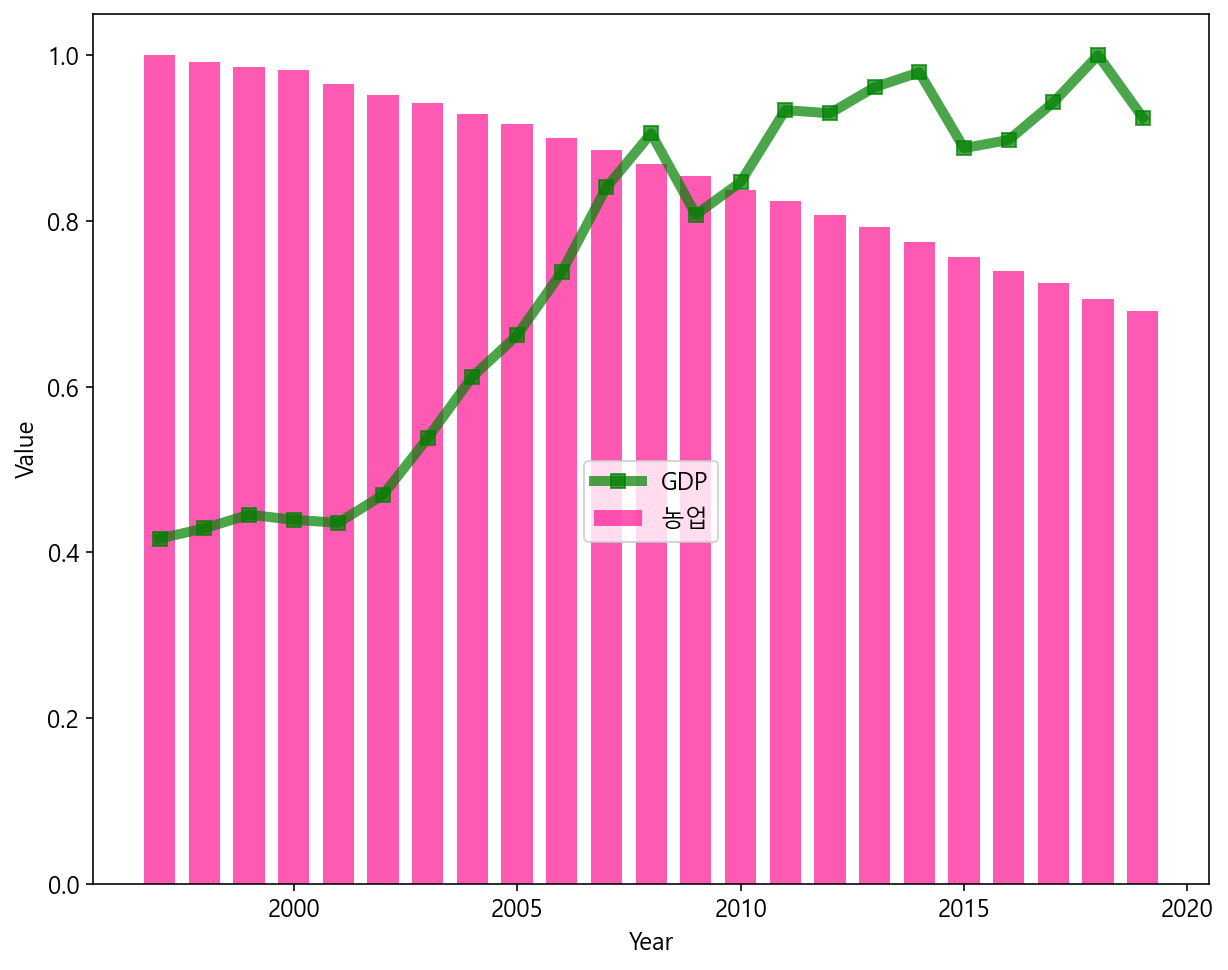

In [70]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

x = fmRDT.index

y1 = list(fmRDT.loc[:, 'GDP'])
y2 = list(fmRDT.loc[:,'AGR'])

fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='GDP')

ax1.set_xlabel('Year')
ax1.set_ylabel('Value')


ax1.bar(x, y2, color='deeppink', label='농업', alpha=0.7, width=0.7)
ax1.set_ylabel(r'Value')


ax1.patch.set_visible(False)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5))

plt.show()

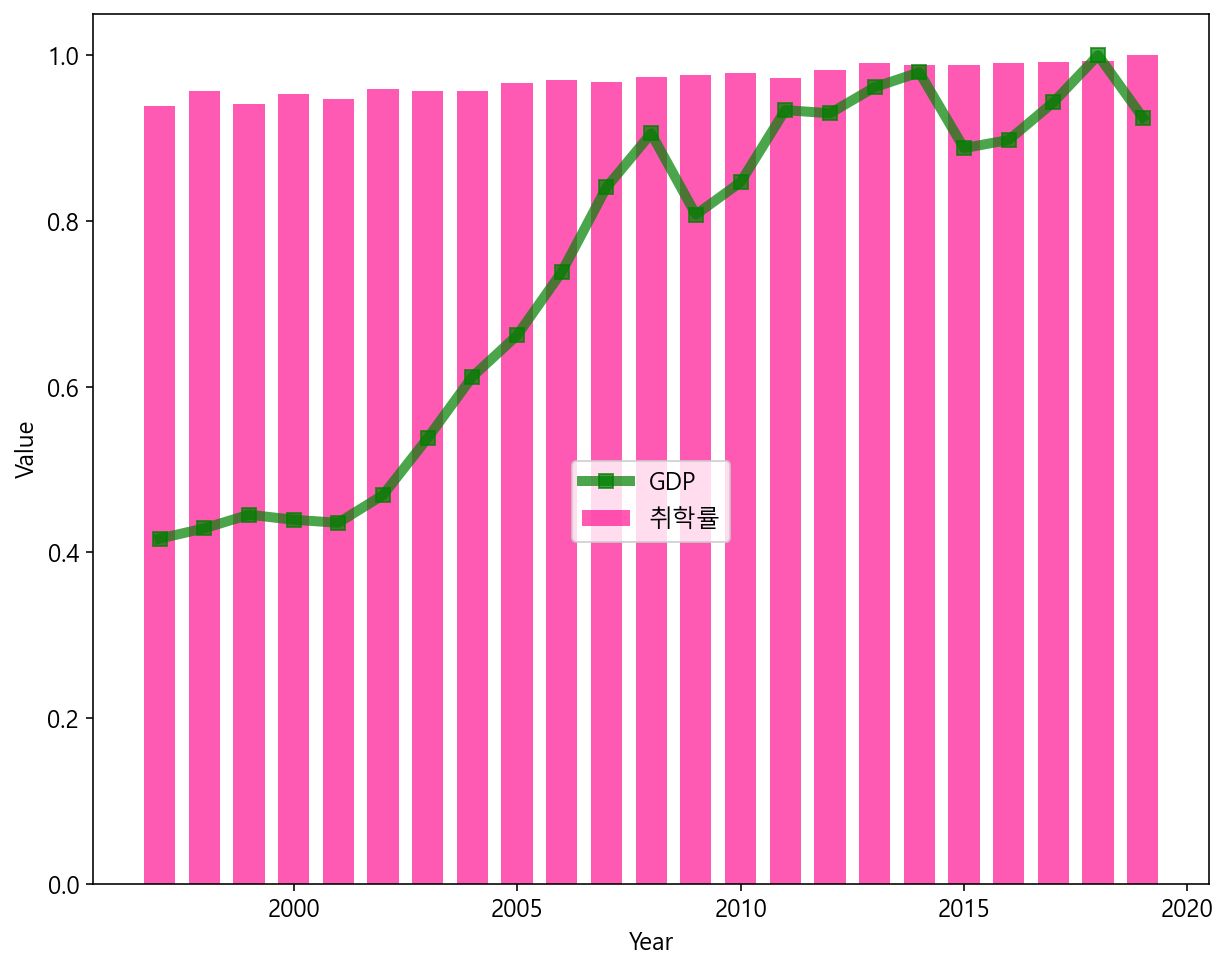

In [71]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

x = fmRDT.index

y1 = list(fmRDT.loc[:, 'GDP'])
y2 = list(fmRDT.loc[:,'ENTERSC'])

fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='GDP')

ax1.set_xlabel('Year')
ax1.set_ylabel('Value')


ax1.bar(x, y2, color='deeppink', label='취학률', alpha=0.7, width=0.7)
ax1.set_ylabel(r'Value')


ax1.patch.set_visible(False)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5))

plt.show()

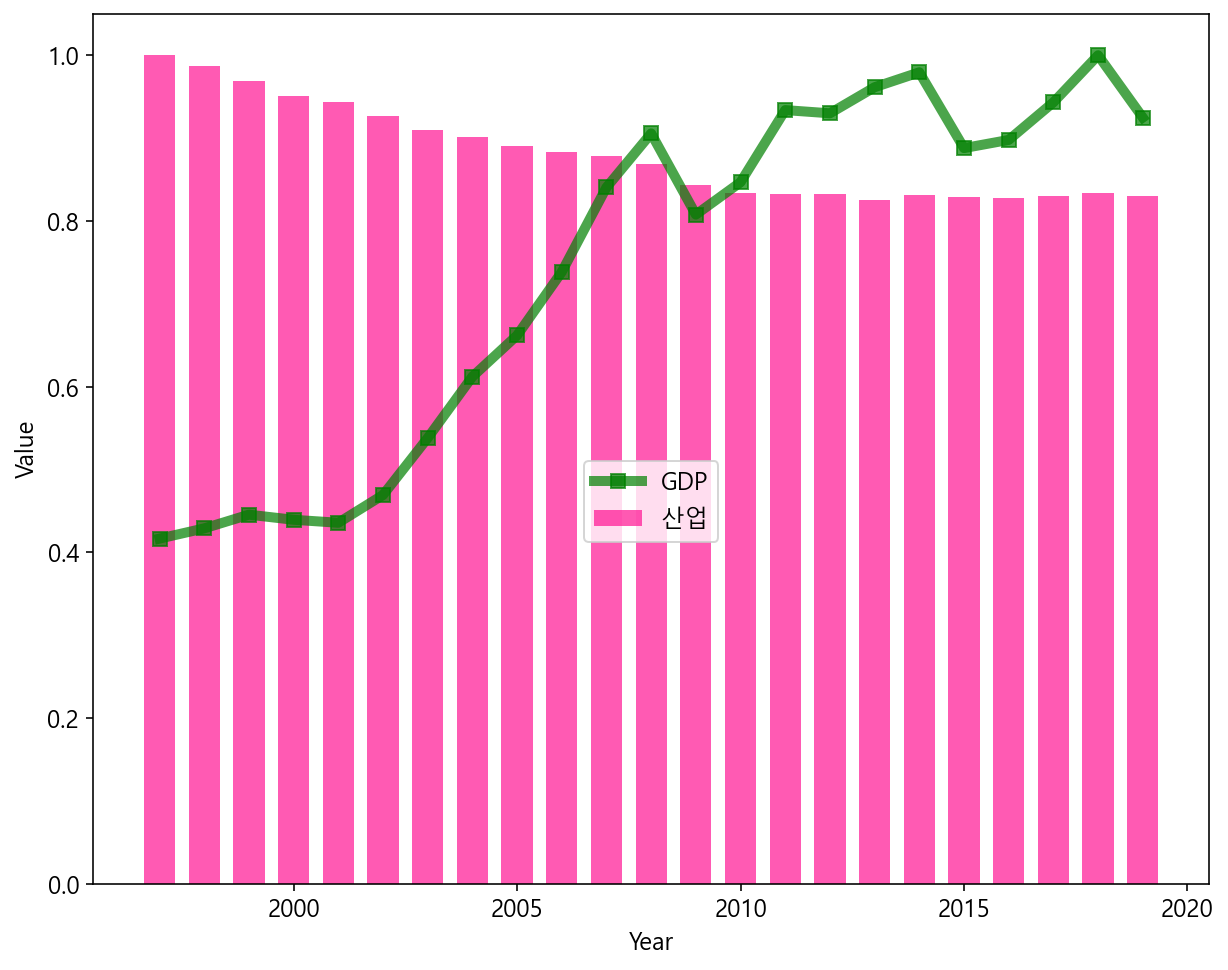

In [72]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

x = fmRDT.index

y1 = list(fmRDT.loc[:, 'GDP'])
y2 = list(fmRDT.loc[:,'IND'])

fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='GDP')

ax1.set_xlabel('Year')
ax1.set_ylabel('Value')


ax1.bar(x, y2, color='deeppink', label='산업', alpha=0.7, width=0.7)
ax1.set_ylabel(r'Value')


ax1.patch.set_visible(False)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5))

plt.show()

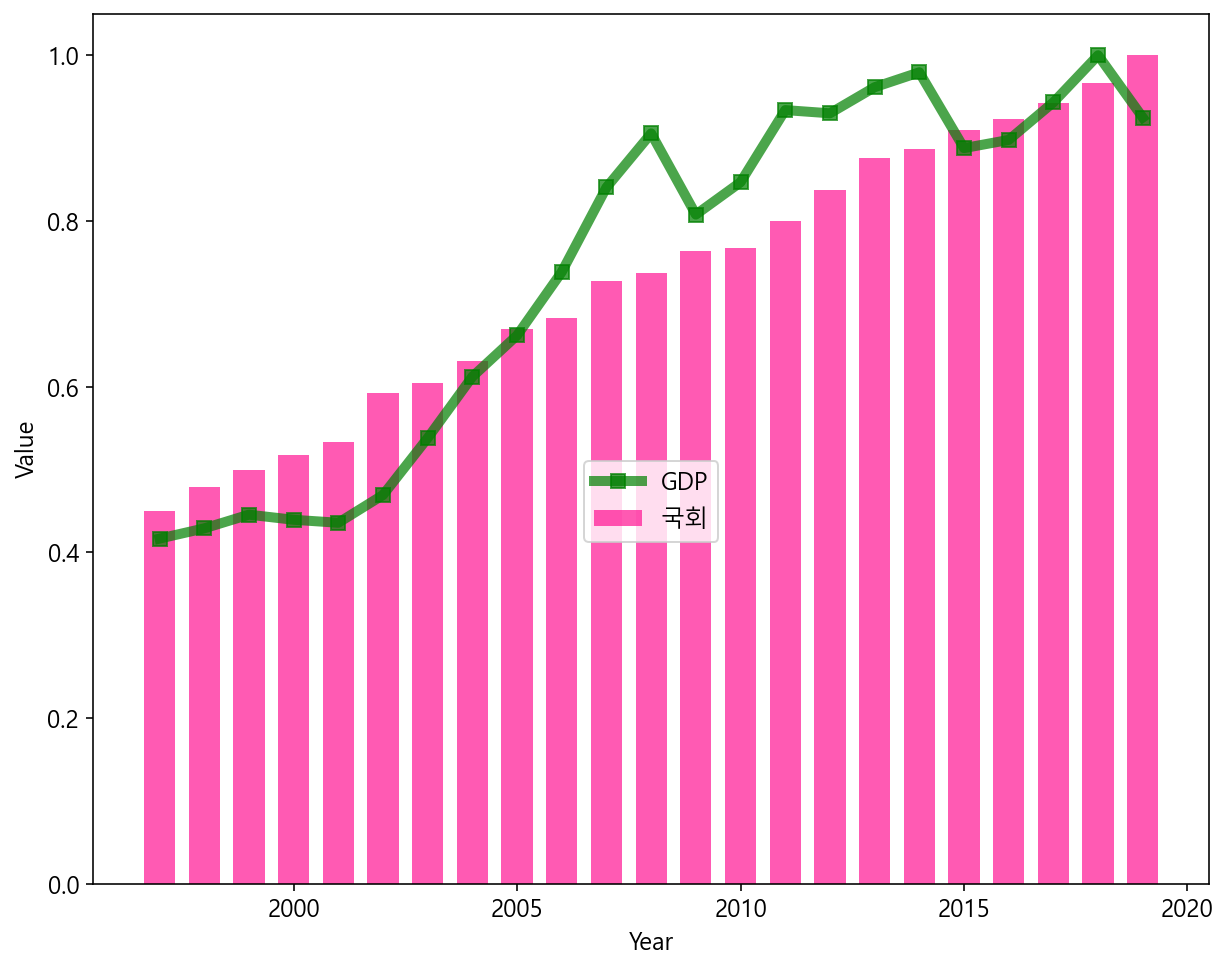

In [73]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

x = fmRDT.index

y1 = list(fmRDT.loc[:, 'GDP'])
y2 = list(fmRDT.loc[:,'PARL'])

fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='GDP')

ax1.set_xlabel('Year')
ax1.set_ylabel('Value')


ax1.bar(x, y2, color='deeppink', label='국회', alpha=0.7, width=0.7)
ax1.set_ylabel(r'Value')


ax1.patch.set_visible(False)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5))

plt.show()

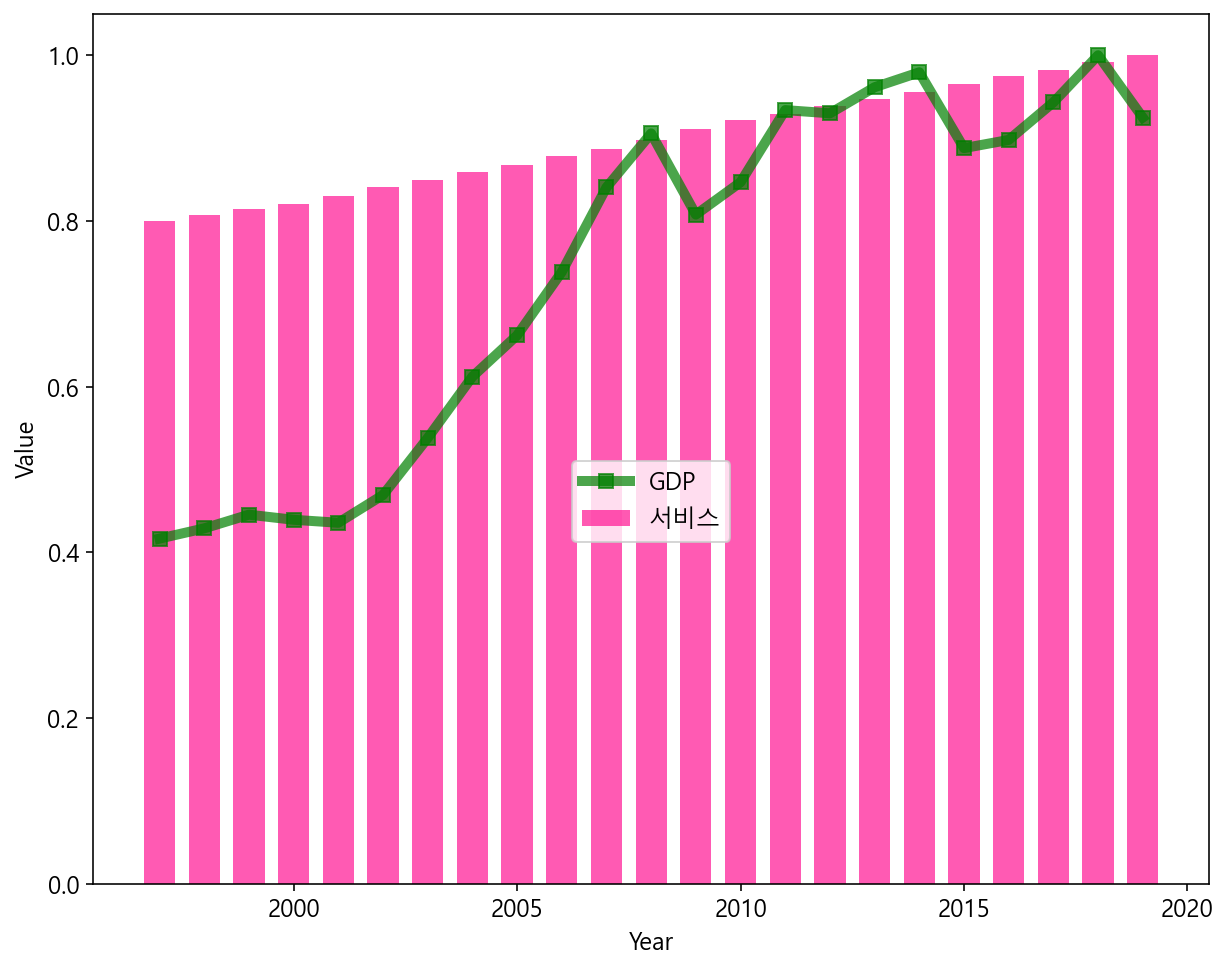

In [74]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

x = fmRDT.index

y1 = list(fmRDT.loc[:, 'GDP'])
y2 = list(fmRDT.loc[:,'SRV'])

fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='GDP')

ax1.set_xlabel('Year')
ax1.set_ylabel('Value')


ax1.bar(x, y2, color='deeppink', label='서비스', alpha=0.7, width=0.7)
ax1.set_ylabel(r'Value')


ax1.patch.set_visible(False)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5))

plt.show()

### 이렇듯, 농업과 산업을 제외하고는, 점점 시간이 지남에 따라 증가하는 추세이다.

### 3차 시각화 : 히트맵으로 시각화

In [79]:
gdpDF = totRST.copy()
gdpDF["GDP"] = pd.qcut(totRST["GDP"], 15, labels = ["GDP"+str(i) for i in range(1, 16)])
gdpDF = gdpDF.dropna(how='any').iloc[:,2:]
### 15개의 클래스로 분류 GDP1 ~ GDP15
gdpDF

,GDP,ENTERSC,PARL,AGR,IND,SRV
135,GDP2,0.54769,27.309237,78.089996,11.53,10.380000
136,GDP2,0.57323,27.309237,77.639999,11.80,10.570000
137,GDP3,0.56720,27.685950,76.379997,12.69,10.930000
138,GDP3,0.58602,27.685950,76.160004,12.92,10.920000
139,GDP4,0.60961,27.309237,74.220001,14.81,10.970000
...,...,...,...,...,...,...
13468,GDP4,0.94385,10.000000,69.529999,4.29,26.180000
13469,GDP4,0.94233,10.000000,69.900002,4.14,25.959999
13470,GDP4,0.94786,10.000000,70.800003,3.99,25.209999
13479,GDP7,0.96703,14.953271,71.379997,2.77,25.840000


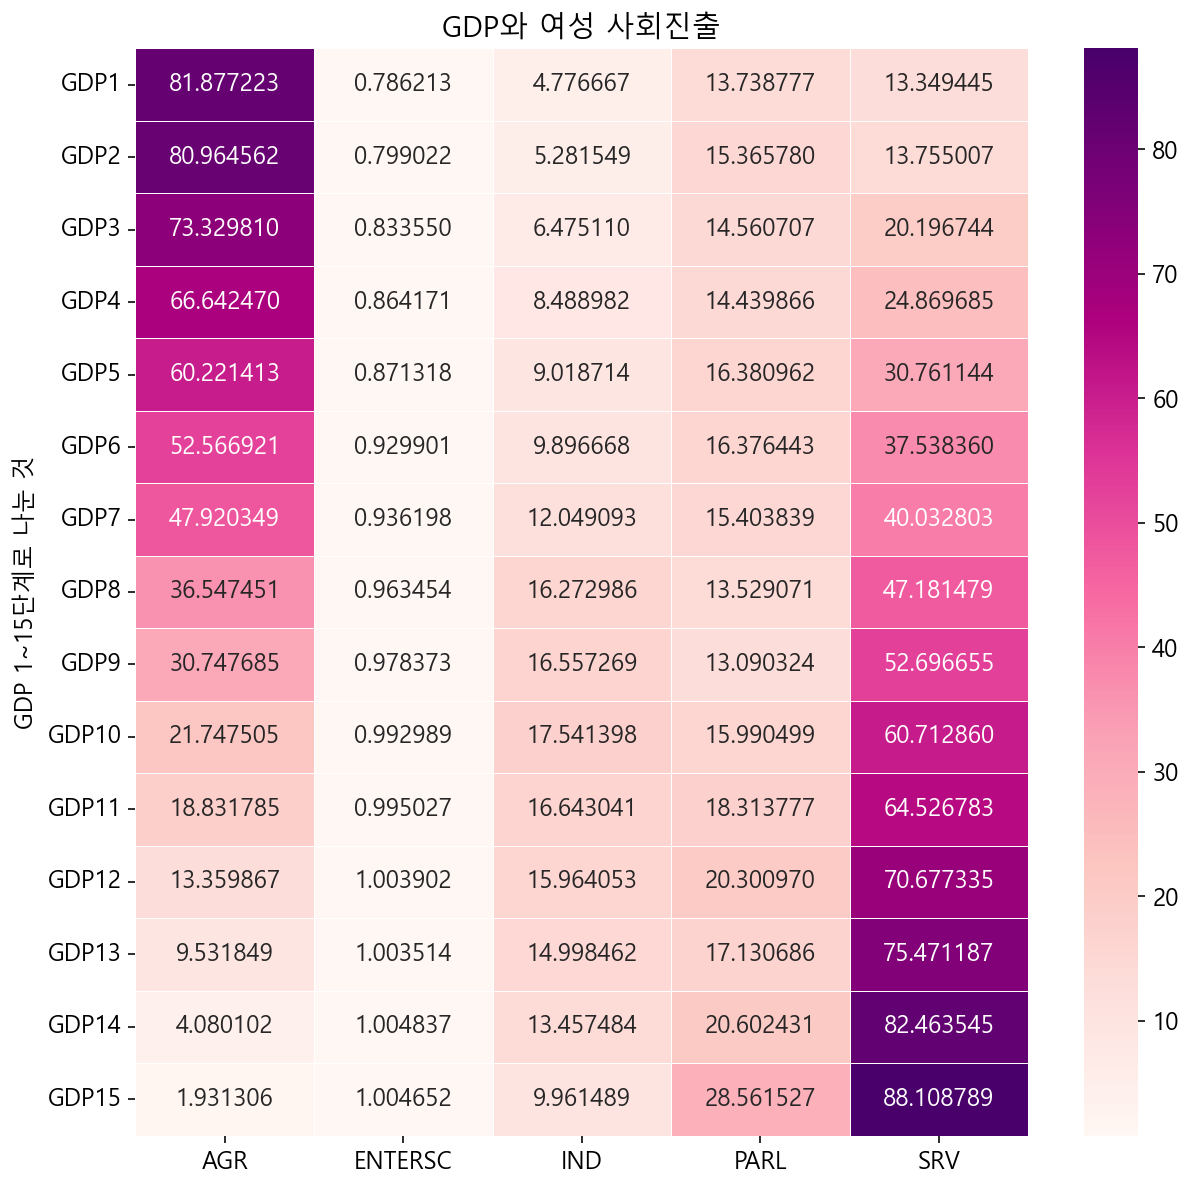

In [82]:
gdpDT = pd.pivot_table(gdpDF, index= ['GDP'], aggfunc=np.mean)
plt.figure(figsize=(10,10))
sns.heatmap(gdpDT, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('GDP와 여성 사회진출')
plt.ylabel('GDP 1~15단계로 나눈 것')
plt.show()

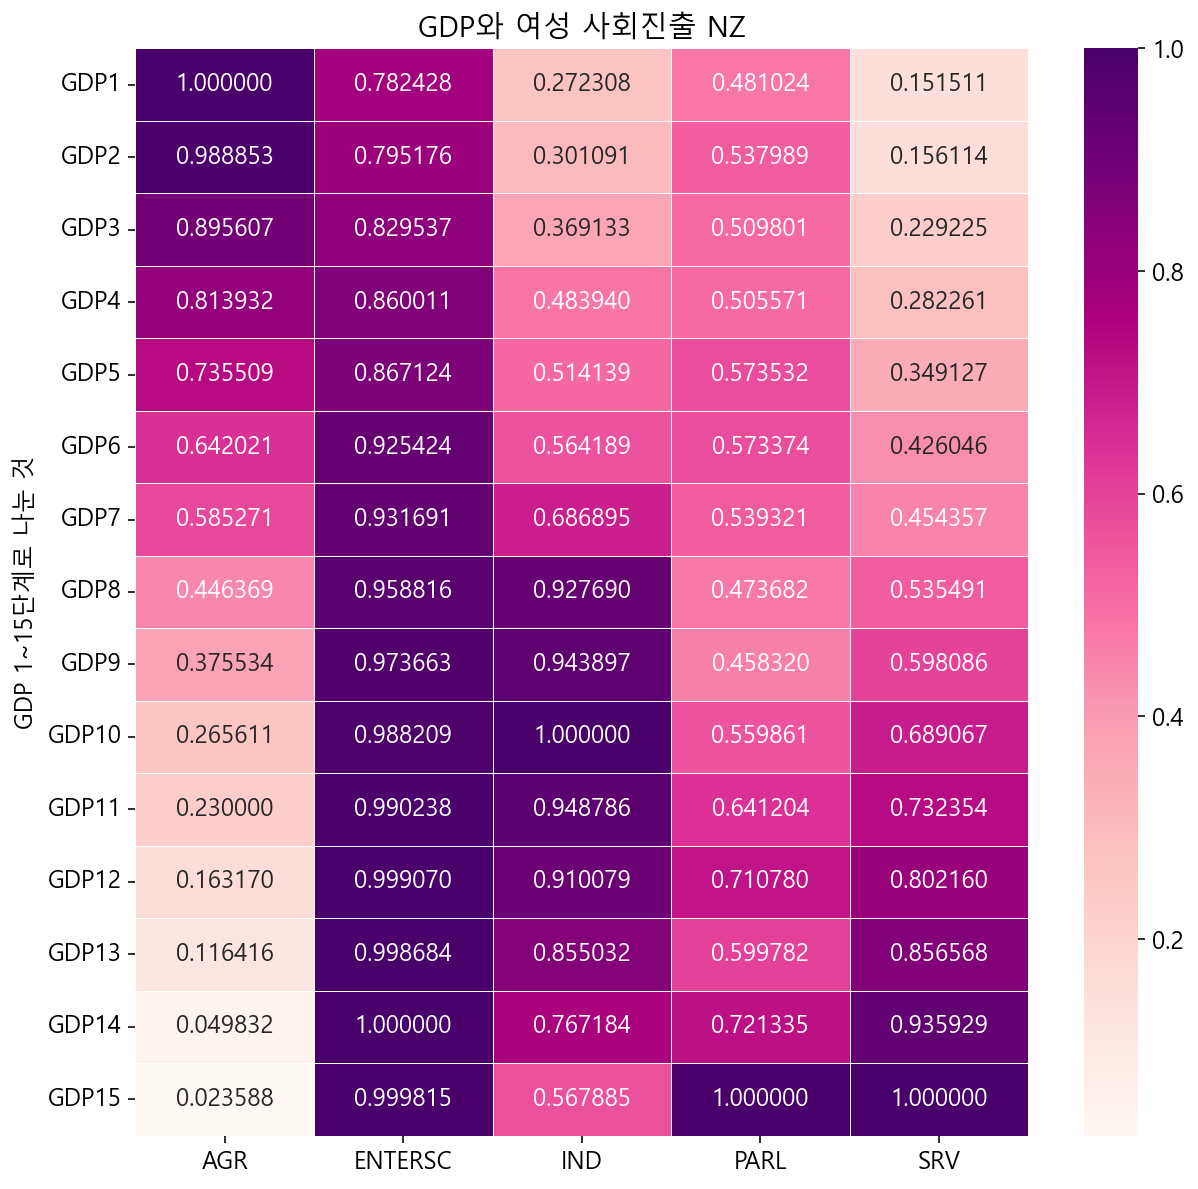

In [84]:
gdpDRT = gdpDT / gdpDT.max()
plt.figure(figsize=(10,10))
sns.heatmap(gdpDRT, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('GDP와 여성 사회진출 NZ')
plt.ylabel('GDP 1~15단계로 나눈 것')
plt.show()